In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/weight-height.csv")
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [3]:
df.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [4]:
df.Height *= 2.54
df.Weight /= 2.2

In [5]:
df.head(10)

,Gender,Height,Weight
0,Male,187.571423,109.951620
1,Male,174.706036,73.777488
2,Male,188.239668,96.700389
3,Male,182.196685,100.019305
4,Male,177.499761,93.795364
5,Male,170.822660,69.187344
6,Male,174.714106,83.603586
7,Male,173.605229,76.350505
8,Male,170.228132,79.967927
9,Male,161.179495,71.090762


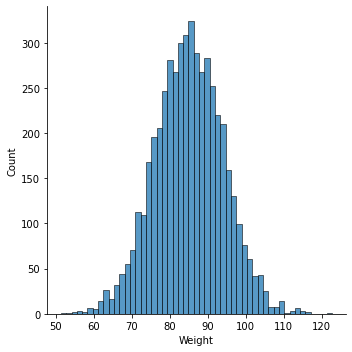

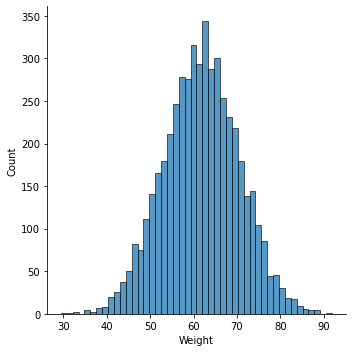

In [9]:
sns.displot(df.query("Gender=='Male'").Weight)
sns.displot(df.query("Gender=='Female'").Weight)
#sns.displot(df.Weight, hue='Gender')

In [12]:
df = pd.get_dummies(df)
del(df["Gender_Male"])
df

,Height,Weight,Gender_Female
0,187.571423,109.951620,0
1,174.706036,73.777488,0
2,188.239668,96.700389,0
3,182.196685,100.019305,0
4,177.499761,93.795364,0
...,...,...,...
9995,168.078536,62.171570,1
9996,170.350573,77.667230,1
9997,162.224700,58.397872,1
9998,175.346978,74.478392,1


In [13]:
df.rename(columns={"Gender_Female":"Gender"}, inplace=True)
df

,Height,Weight,Gender
0,187.571423,109.951620,0
1,174.706036,73.777488,0
2,188.239668,96.700389,0
3,182.196685,100.019305,0
4,177.499761,93.795364,0
...,...,...,...
9995,168.078536,62.171570,1
9996,170.350573,77.667230,1
9997,162.224700,58.397872,1
9998,175.346978,74.478392,1


In [14]:
# Dla Gender: 0-mezczyna, 1-kobieta
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model.fit( df[ ["Height","Gender"] ] , df["Weight"] )

LinearRegression()

In [20]:
model.coef_, model.intercept_

(array([ 1.06960294, -8.80805024]), -102.52081454490089)

In [21]:
pd.DataFrame(model.coef_, ["Height","Gender"])

,0
Height,1.069603
Gender,-8.808050


In [25]:
gender = 0
height = 192
weight = model.intercept_ + model.coef_[0]*height +model.coef_[1]*gender
weight

102.84294990633599

In [27]:
model.predict([ [192, 0] , [167, 1], [181, 0] ])

array([102.84294991,  67.29482617,  91.07731757])

### Predykcja wyceny nieruchomości dla W-wa/Mokotów

In [28]:
df = pd.read_csv("http://51.91.120.89/extras/otodom.csv")
df

,id,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
0,46lCR,979000,5,4,5,83.00,2009
1,44Utr,1400000,7,3,2,82.94,2011
2,3Bdli,640659,4,3,2,64.13,2019
3,46q1p,410000,12,2,4,36.30,1975
4,468dI,415900,10,2,6,31.06,1974
...,...,...,...,...,...,...,...
4309,33tFV,2500000,2,6,2,210.00,2015
4310,2UNVb,1860000,8,3,7,98.00,2012
4311,2JILp,995000,13,5,8,138.00,1997
4312,2zmYc,2550000,3,3,1,118.50,2009


In [29]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


<AxesSubplot:>

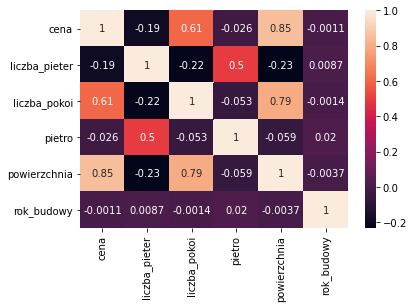

In [31]:
sns.heatmap( df.corr(), annot=True )

<AxesSubplot:>

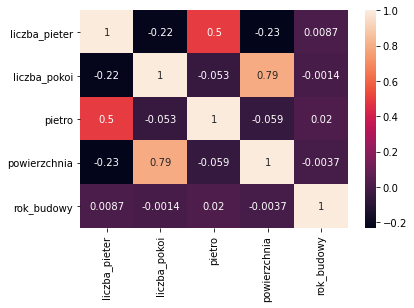

In [35]:
sns.heatmap( df.iloc[: , 2:].corr() , annot=True)

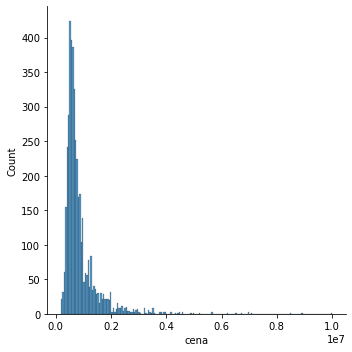

In [36]:
sns.displot(df.cena)

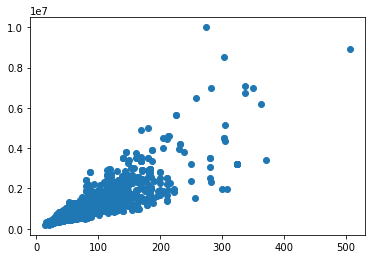

In [37]:
plt.scatter(df.powierzchnia, df.cena)

In [38]:
df.describe()

,cena,liczba_pieter,liczba_pokoi,pietro,powierzchnia,rok_budowy
count,4.314000e+03,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,8.616312e+05,7.210246,2.807371,3.400093,70.346140,2010.707464
std,6.459324e+05,4.065722,1.069238,2.657749,40.817224,272.651375
min,1.873300e+05,1.000000,1.000000,0.000000,14.410000,1970.000000
25%,5.250000e+05,4.000000,2.000000,1.000000,45.200000,2000.000000
50%,6.674315e+05,7.000000,3.000000,3.000000,60.000000,2012.000000
75%,9.399000e+05,10.000000,3.000000,5.000000,81.000000,2020.000000
max,1.000000e+07,30.000000,9.000000,10.000000,506.000000,19885.000000


In [39]:
_min = df.describe().loc["min","cena"]
q1 = df.describe().loc["25%","cena"]
q3 = df.describe().loc["75%","cena"]
_min, q1, q3

(187330.0, 525000.0, 939900.0)

In [40]:
df1 = df[(df.cena>=_min)&(df.cena<=q3)]

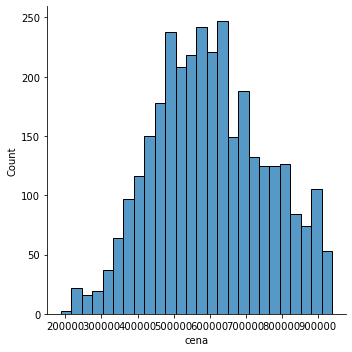

In [41]:
sns.displot(df1.cena)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [45]:
X = df1.iloc[: , 2:]
y = df1.cena

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train.shape, X_test.shape

((2588, 5), (648, 5))

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6738871746608246

In [51]:
pd.DataFrame(model.coef_ , X.columns)

,0
liczba_pieter,1063.488889
liczba_pokoi,-23986.246680
pietro,-28.002329
powierzchnia,8597.633562
rok_budowy,-0.975540


In [54]:
# importujemy klase dla drzewa decyzyjnego
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7886249028735319